<a href="https://colab.research.google.com/github/Shruti-Patnaik/Algorithm-on-Heart-Dataset/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the pandas library and loading the dataset.

In [1]:
import pandas as pd

In [2]:
heart_data = pd.read_csv('/content/heart.csv')

In [3]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
heart_data.shape

(918, 12)

Now, let us see the null values in the dataset

In [5]:
heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

So, we see here that there are no NaN values.
Let us take a look on the datatype of each feature.

In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Let us now take a look on the statistical measures of the dataset.

In [7]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Visualizing the data

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

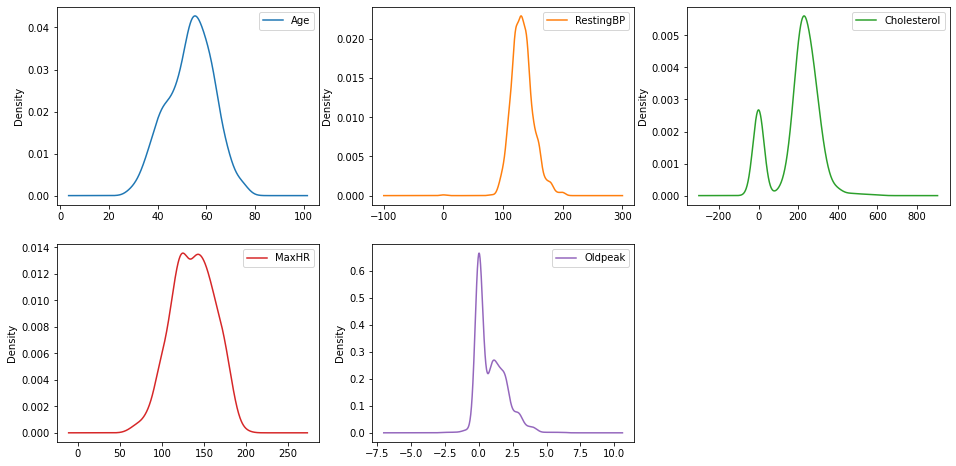

In [9]:
final_numeric_feature = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
heart_data[final_numeric_feature].plot(kind='density', subplots=True, layout=(2,3), sharex=False, figsize= (16,8))
plt.show()

Box-Plot Representation.

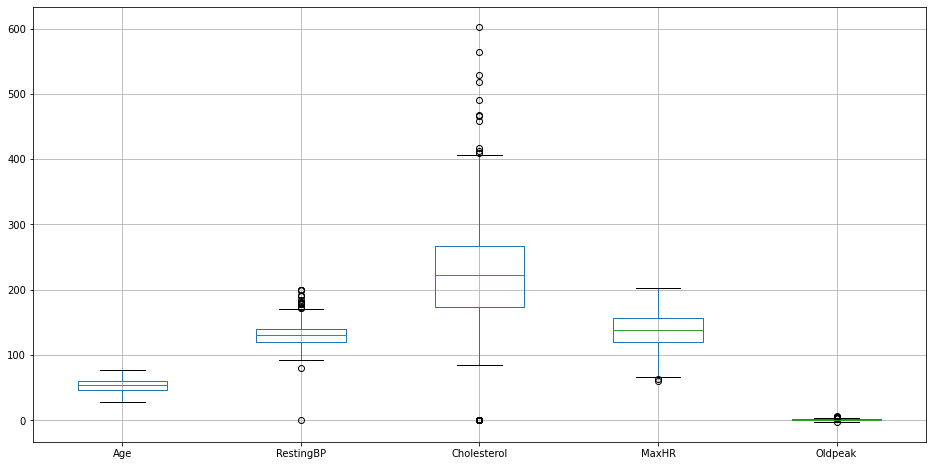

In [10]:
heart_data[final_numeric_feature].boxplot(figsize= (16,8))
plt.show()

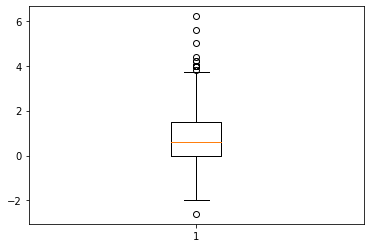

In [11]:
#for oldpeak
plt.boxplot(heart_data['Oldpeak'])
plt.show()

From the box plot, we see that there are certain outliers in the numeric features except Age. but we cannot detect which is error and which is not. so we leave it as it is.

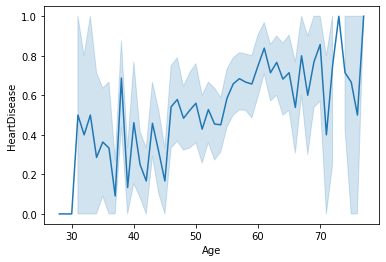

In [12]:
sns.lineplot(x='Age' ,y='HeartDisease', data=heart_data)
plt.show()

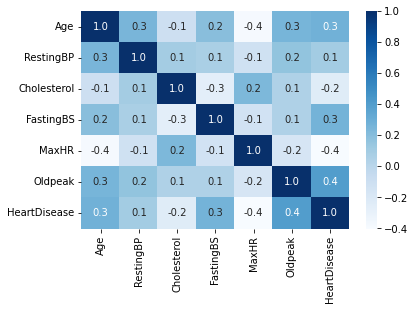

In [13]:
#corelation among features
correlation=heart_data.corr()
sns.heatmap(correlation,annot=True,fmt=".1f",cmap='Blues')

from the heat-map we see that the heart disease are found proportional to age, FastingBS and Oldpeak.

Now, we change the categorical data into numeric. 

Conversion of categorical data to Numerical data

In [14]:
heart_data['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [15]:
heart_data['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [16]:
heart_data['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [17]:
heart_data['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [18]:
heart_data['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder


In [20]:
encode= LabelEncoder()
heart_data['Sex']=encode.fit_transform(heart_data['Sex'])
heart_data['Sex'].unique()

array([1, 0])

In [21]:
heart_data['ChestPainType']=encode.fit_transform(heart_data['ChestPainType'])
heart_data['ChestPainType'].value_counts()

0    496
2    203
1    173
3     46
Name: ChestPainType, dtype: int64

In [22]:
heart_data['ExerciseAngina']=encode.fit_transform(heart_data['ExerciseAngina'])
heart_data['ExerciseAngina'].value_counts()

0    547
1    371
Name: ExerciseAngina, dtype: int64

In [23]:
heart_data['RestingECG']=encode.fit_transform(heart_data['RestingECG'])
heart_data['RestingECG'].value_counts()

1    552
0    188
2    178
Name: RestingECG, dtype: int64

In [24]:
heart_data['ST_Slope']=encode.fit_transform(heart_data['ST_Slope'])
heart_data['ST_Slope'].value_counts()

1    460
2    395
0     63
Name: ST_Slope, dtype: int64

Hence, the encoded data are now

SEX male->1 Female->0

ChestPainType ASY->0  NAP->2  ATA->1  TA->3

ExerciseAgina  N->0  Y->1

RestingECG Normal->1  LVH->0  ST->2

ST_Slope Flat->1  Up->2  down->0

In [25]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [26]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


Since here numeric features has different ranges, let us normalize the dataset.


Here we are using z-score normalization.

Before that we need to seperate the predictor and the target.

In [27]:
X= heart_data.drop(labels='HeartDisease', axis=1)
y=heart_data['HeartDisease']
z,m=X,y
print(X)
print(y)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

In [28]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_stand = scaler.fit_transform(X)

In [29]:
print(X_stand)

[[-1.4331398   0.51595242  0.22903206 ... -0.8235563  -0.83243239
   1.05211381]
 [-0.47848359 -1.93816322  1.27505906 ... -0.8235563   0.10566353
  -0.59607813]
 [-1.75135854  0.51595242  0.22903206 ... -0.8235563  -0.83243239
   1.05211381]
 ...
 [ 0.37009972  0.51595242 -0.81699495 ...  1.21424608  0.29328271
  -0.59607813]
 [ 0.37009972 -1.93816322  0.22903206 ... -0.8235563  -0.83243239
  -0.59607813]
 [-1.64528563  0.51595242  1.27505906 ... -0.8235563  -0.83243239
   1.05211381]]


Spliting traing and testing dataset

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [31]:
x_train,x_test, y_train, y_test = train_test_split(X_stand, y, random_state=42, test_size=0.25)
print(y_train.value_counts())

1    376
0    312
Name: HeartDisease, dtype: int64


1- KNN Algorithm

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn= KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train , y_train) 
knn_pred=knn.predict(x_test)
train_pred = knn.predict(x_train)
print("The accuracy for test data is ",accuracy_score(y_test,knn_pred))
print("The accuracy for train data is ",accuracy_score(y_train,train_pred))

The accuracy for test data is  0.8652173913043478
The accuracy for train data is  0.8837209302325582


Knowing the correct value of neighbour.

In [34]:
import numpy as np

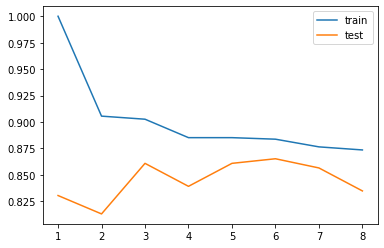

In [35]:
no_of_neigh = np.arange(1,9)
test=[]
train=[]

for i in no_of_neigh:
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  train.append(knn.score(x_train,y_train))
  test.append(knn.score(x_test,y_test))

plt.plot(no_of_neigh, train,label="train")
plt.plot(no_of_neigh, test,label="test")
plt.legend()
plt.show()


here we see, we are getting highest accuracy in K=5

The accuracy of the model is 0.86

In [36]:
#Testing the model
data=[40,1,1,140,289,0,1,172,0,0.0,2]
new_data=pd.DataFrame([data],columns=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope'])
knn.predict(new_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0])

In [37]:
#Testing the model
data=[68,1,0,144,193,1,1,141,0,3.4,1]
new_data=pd.DataFrame([data],columns=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope'])
knn.predict(new_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0])

2- Decision Tree 

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
x_train,x_test, y_train, y_test = train_test_split(X_stand, y, random_state=42, test_size=0.2)
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
test_pred = dtc.predict(x_test)
train_pred= dtc.predict(x_train)


print("The accuracy on test data is ", accuracy_score(y_test,test_pred))
print("The accuracy on train data is ", accuracy_score(y_train,train_pred))

The accuracy on test data is  0.8097826086956522
The accuracy on train data is  1.0


Here, we encounter the OVERFITTING problem 

In [40]:
#Testing the model
data=[40,1,1,140,289,0,1,172,0,0.0,2]
new_data=pd.DataFrame([data],columns=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope'])
dtc.predict(new_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0])

In [41]:
#Testing the model
data=[68,1,0,144,193,1,1,141,0,3.4,1]
new_data=pd.DataFrame([data],columns=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope'])
dtc.predict(new_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([1])

With the help of decision tree we got and accuracy of 0.78

In [42]:
#Testing the model
data=[39,1,2,120,339,0,1,170,0,0.0,2]
new_data=pd.DataFrame([data],columns=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope'])
dtc.predict(new_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0])

3- Naive Bayes

Since, the previous test/train split was giving accuracy of test greater than accuracy of train we re-split the data

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
x_train,x_test, y_train, y_test = train_test_split(X_stand, y, random_state=42, test_size=0.2)
gnb = GaussianNB()
gnb.fit(x_train,y_train)
train_pred_gnb = gnb.predict(x_train)
test_pred_gnb = gnb.predict(x_test)

print("The accuracy on test data is ", accuracy_score(y_test,test_pred_gnb))
print("The accuracy on train data is ", accuracy_score(y_train,train_pred_gnb))

The accuracy on test data is  0.842391304347826
The accuracy on train data is  0.8637602179836512


In [45]:
#Testing the model
data=[40,1,1,140,289,0,1,172,0,0.0,2]
new_data=pd.DataFrame([data],columns=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope'])
dtc.predict(new_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0])

By using Naive Bayes, we got an accuracy of 0.84 on test and 0.86 on training

4- K-Means Clustering

In [46]:
from sklearn.cluster import KMeans

In [74]:
kmeans= KMeans(n_clusters=2 ,random_state=42)     #On trying different number of clusters, we got highest match is 2 clusters.
kmeans.fit(X)
labels= kmeans.labels_
correct_labs=(sum(y==labels))

print(correct_labs, " out of ",len(y)," matches found.")

545  out of  918  matches found.


In [73]:
print('accuracy score is {0:0.02f}'.format(correct_labs/float(len(y))))

accuracy score is 0.59


Here, our model is working poorly with 59% accuracy.